# **STATISTIQUE ET PROBABILITES**

Name: **STATISTIQUE DESCRIPTIVE - STATISTIQUE DESCRIPTIVE UNIVARIEE**  
Date : 2023  
Author: Aurélien Vannieuwenhuyze  


<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licence Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under the terms of the <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License.</a>.
<hr/>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
import numpy as np
from scipy import stats as st
import pandas as pnd
from scipy.stats import skewnorm
from scipy.stats import kurtosis
from scipy.stats import skew
from prettytable import PrettyTable
import scipy.stats as stats


In [ ]:
datas = [3,19,10,15,14,12,19,8,11,12,11,12,13,11,14,16]
df = pnd.DataFrame(datas,columns=["X"])


datasgroupees = [153, 165, 160, 150, 159, 151, 163,
160, 158, 149, 154, 153, 163, 140,
158, 150, 158, 155, 163, 159, 157,
162, 160, 152, 164, 158, 153, 162,
166, 162, 165, 157, 174, 158, 171,
162, 155, 156, 159, 162, 152, 158,
164, 164, 162, 158, 156, 171, 164,
158]

IC = [[140,145.0],  [145.0,150.0], [150.0,155.0], [155.0,160.0], [160.0,165.0], [165.0,170.0],[170.0,175.0]]

##**1: CARACTERISTIQUES DE POSITION**

###Mode

In [ ]:
def mode(X):
  u = np.unique(X)
  n=[]
  for v in u:
    ni = np.count_nonzero(X==v)
    n.append(ni)

  vMax = max(n)

  modes = []
  for i in range(0,len(u)):
    if n[i] == vMax:
      modes.append(u[i])
  print("Mode(s) = ",modes, " - effectif :",vMax)


In [ ]:
mode(datas)

Mode(s) =  [11, 12] effectif : 3


In [ ]:
st.mode(datas)

ModeResult(mode=array([11]), count=array([3]))

###Mediane

In [ ]:
np.median(datas)

12.0

In [ ]:
df["X"].median()

12.0

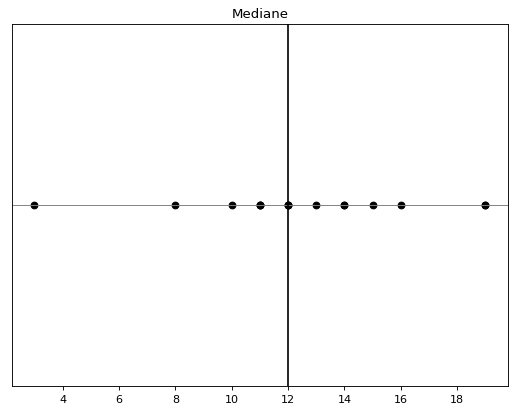

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.plot(datas, np.zeros(len(datas)), 'o',color="black")
plt.axhline(y=0, color='gray', linewidth=0.85)
plt.title("Mediane")
ax = plt.gca()
ax.get_yaxis().set_visible(False)
plt.axvline(np.median(datas),color="black")
plt.show()

### Quantiles

In [ ]:
print(sorted(datas))

[3, 8, 10, 11, 11, 11, 12, 12, 12, 13, 14, 14, 15, 16, 19, 19]


In [ ]:
X = sorted(datas)
n = len(datas)
alpha = 0.1
i = (n-1)*alpha
f = i - int(i)
g=int(i)
d=g+1
print("i:",i)
print("f:",f)
print("g:",g)
print("d:",d)
print("Xg : ",X[g])
print("Xd : ",X[d])
print("Q(X):",X[g] + (X[d] - X[g]) * f)


i: 1.5
f: 0.5
g: 1
d: 2
Xg :  8
Xd :  10
Q(X): 9.0


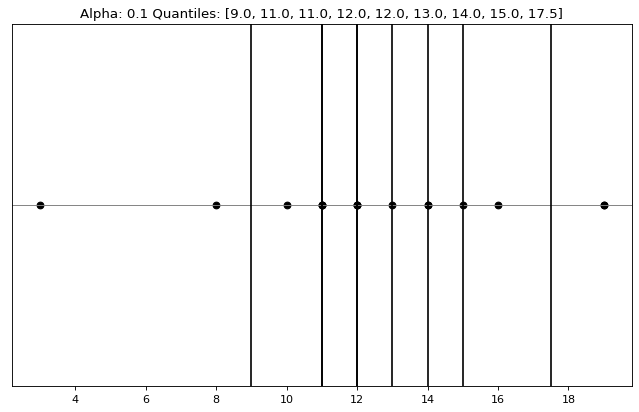

In [ ]:
alpha = 0.10
nb = (100/(100*alpha))-1
quantiles=[]

a= alpha
for i in range(0,int(nb)):
  quantiles.append(round(np.quantile(datas,a),2))
  a += alpha

figure(figsize=(10, 6), dpi=80)
plt.plot(datas, np.zeros(len(datas)), 'o',color="black")
plt.axhline(y=0, color='gray', linewidth=0.85)
plt.title("Alpha: "+str(alpha)+" Quantiles: "+str(quantiles))
ax = plt.gca()
ax.get_yaxis().set_visible(False)

for q in quantiles:
  plt.axvline(q,color="black")

plt.show()

In [ ]:
np.quantile(datas,0.10)

9.0

In [ ]:
df["X"].quantile(0.10)

9.0

###Quartiles

#### Boite à moustaches

Ecart interquartile:  3.25


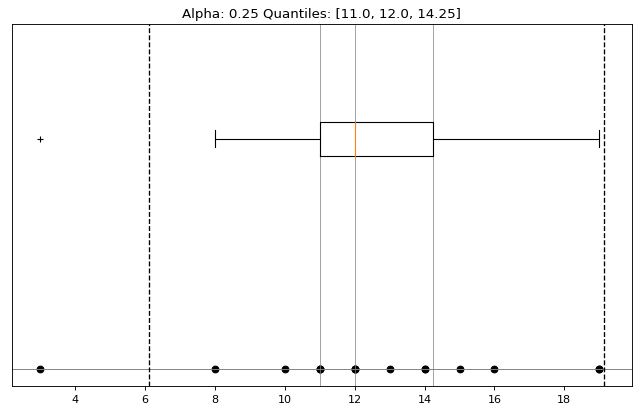

In [ ]:
alpha = 0.25
nb = (100/(100*alpha))-1
quantiles=[]

a= alpha
for i in range(0,int(nb)):
  quantiles.append(round(np.quantile(datas,a),2))
  a += alpha

LowBorder = quantiles[0] - 1.5 * (quantiles[2]-quantiles[0])
HighBorder = quantiles[2]+ 1.5 * (quantiles[2]-quantiles[0])

IQR = quantiles[2]-quantiles[0]
print("Ecart interquartile: ",IQR)

figure(figsize=(10, 6), dpi=80)
plt.plot(datas, np.zeros(len(datas)), 'o',color="black")
plt.axhline(y=0, color='gray', linewidth=0.85)
plt.title("Alpha: "+str(alpha)+" Quantiles: "+str(quantiles))
ax = plt.gca()
ax.get_yaxis().set_visible(False)

for q in quantiles:
  plt.axvline(q,color="gray",linewidth=0.65)

plt.axvline(LowBorder,color="black", linestyle="--",linewidth=1.2)
plt.axvline(HighBorder,color="black",linestyle="--",linewidth=1.2)

ax.boxplot(datas,notch=False, sym='+', vert=False, whis=1.5,
        positions=None, widths=None, patch_artist=False,
        bootstrap=None, usermedians=None, conf_intervals=None)

plt.show()

### Moyenne

#### Données non goupées

In [ ]:
y = np.zeros(len(datas))
x = datas

In [ ]:
np.mean(x)

12.5

In [ ]:
df["X"].mean()

12.5

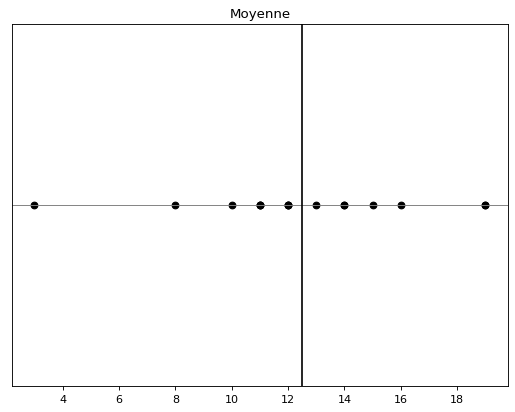

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.plot(x, y, 'o',color="black")
plt.axhline(y=0, color='gray', linewidth=0.85)
ax = plt.gca()
ax.get_yaxis().set_visible(False)
plt.title("Moyenne")
plt.axvline(np.mean(x),color="Black")
plt.show()

#### Données groupées

In [ ]:
def moyenne_donnees_groupees(X,IC):

  #Centre de classe:
  centres = []
  for i in range(0,len(IC)):
    centres.append((IC[i][1]+IC[i][0])/2)

  #Effectifs
  ni=[]
  for i in IC:
    bMin = i[0]
    bMax = i[1]
    n=0
    for x in X:
      if (x>= bMin and x<bMax):
        n+=1
    ni.append(n)

  #Produits
  Prod = []
  for i in range(0,len(IC)):
    Prod.append(centres[i]*ni[i])

  #Moyenne
  somme = np.sum(Prod)
  moyenne = somme/len(X)

  tab = PrettyTable()
  tab.field_names=(["ci","xi (centre ci)","ni","xini"])
  for i in range(0,len(IC)):
    intervalle = '['+str(IC[i][0])+";"+str(IC[i][1])+'['
    tab.add_row([intervalle,centres[i],ni[i],Prod[i]])

  print(tab)
  print("n = ",len(X))
  print("somme des xini = ",somme)
  print("Moyenne = ",somme,"/",len(X),"=",moyenne)
  return moyenne


In [ ]:
moyenne = moyenne_donnees_groupees(datasgroupees,IC)

+---------------+----------------+----+--------+
|       ci      | xi (centre ci) | ni |  xini  |
+---------------+----------------+----+--------+
|  [140;145.0[  |     142.5      | 1  | 142.5  |
| [145.0;150.0[ |     147.5      | 1  | 147.5  |
| [150.0;155.0[ |     152.5      | 9  | 1372.5 |
| [155.0;160.0[ |     157.5      | 17 | 2677.5 |
| [160.0;165.0[ |     162.5      | 16 | 2600.0 |
| [165.0;170.0[ |     167.5      | 3  | 502.5  |
| [170.0;175.0[ |     172.5      | 3  | 517.5  |
+---------------+----------------+----+--------+
n =  50
somme des xini =  7960.0
Moyenne =  7960.0 / 50 = 159.2


##**2: CARACTERISTIQUES DE DISPERSION**

In [ ]:
datas = [3,19,10,15,14,12,19,8,11,12,11,12,13,11,14,16]
df = pnd.DataFrame(datas,columns=["X"])

### Etendue

In [ ]:
e = np.max(datas) - np.min(datas)
print(e)

16


In [ ]:
e = df["X"].max() - df["X"].min()
print(e)

16


###Ecart inter-quartiles

In [ ]:
Q1 = np.quantile(datas,0.25)
Q3 = np.quantile(datas,0.75)
EIQ = Q3-Q1
print(EIQ)

3.25


In [ ]:
Q1 = df["X"].quantile(0.25)
Q3 = df["X"].quantile(0.75)
EIQ = Q3-Q1
print(EIQ)

3.25


### Variance (corrigée)

####Données non groupées

In [ ]:
#Attention: Variance sur la distribution par défaut !!
np.var(datas)

14.5

In [ ]:
#Variance corrigée avec numpy
np.var(datas,ddof=1)

15.466666666666667

In [ ]:
#Variance corrigée avec scipy.stats
st.tvar(datas)

15.466666666666667

In [ ]:
#Variance corrigée avec pandas
df["X"].var()

15.466666666666667

#### Données groupées

In [ ]:
def variances_donnees_groupees(X,IC):

  #Centre de classe:
  centres = []
  for i in range(0,len(IC)):
    centres.append((IC[i][1]+IC[i][0])/2)

  #Effectifs
  ni=[]
  for i in IC:
    bMin = i[0]
    bMax = i[1]
    n=0
    for x in X:
      if (x>= bMin and x<bMax):
        n+=1
    ni.append(n)

  #Produits
  Prod = []
  for i in range(0,len(IC)):
    Prod.append(centres[i]*ni[i])

  #Moyenne
  somme = np.sum(Prod)
  moyenne = somme/len(X)


  #Ecart au carré par rapport à la moyenne
  ecarts = []
  for i in range(0,len(IC)):
    xi = centres[i]
    ecarts.append(((xi-moyenne)**2)*ni[i])


  tab = PrettyTable()
  tab.field_names=(["ci","xi (centre ci)","ni","xini","(xi-moy)^2ni"])
  for i in range(0,len(IC)):
    intervalle = '['+str(IC[i][0])+";"+str(IC[i][1])+'['
    tab.add_row([intervalle,centres[i],ni[i],Prod[i],round(ecarts[i],2)])

  somme = np.sum(ecarts)
  variance = somme / (len(X)-1)
  print(tab)
  print("n = ",len(X)-1)
  print("somme ((xi-moy)^2) = ",somme)
  print("Variance corrigée = ",somme,"/",len(X)-1,"=",variance)
  return variance

In [ ]:
var_corrigee = variances_donnees_groupees(datasgroupees,IC)

+---------------+----------------+----+--------+--------------+
|       ci      | xi (centre ci) | ni |  xini  | (xi-moy)^2ni |
+---------------+----------------+----+--------+--------------+
|  [140;145.0[  |     142.5      | 1  | 142.5  |    278.89    |
| [145.0;150.0[ |     147.5      | 1  | 147.5  |    136.89    |
| [150.0;155.0[ |     152.5      | 9  | 1372.5 |    404.01    |
| [155.0;160.0[ |     157.5      | 17 | 2677.5 |    49.13     |
| [160.0;165.0[ |     162.5      | 16 | 2600.0 |    174.24    |
| [165.0;170.0[ |     167.5      | 3  | 502.5  |    206.67    |
| [170.0;175.0[ |     172.5      | 3  | 517.5  |    530.67    |
+---------------+----------------+----+--------+--------------+
n =  49
somme ((xi-moy)^2) =  1780.5
Variance corrigée =  1780.5 / 49 = 36.33673469387755


#### Pourquoi N-1 ?

Exemple sur une petite population

Moyenne v1: 3.0
Moyenne v2: 6.0


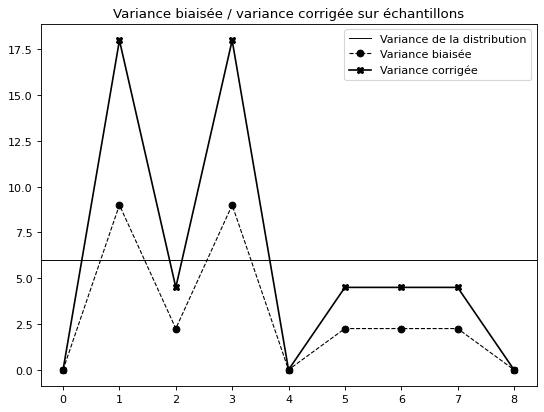

In [ ]:
distribution = [2,8,5]
np.mean(distribution)
np.var(distribution)

echantillons = [[2,2],[2,8],[2,5],[8,2],[8,8],[8,5],[5,2],[5,8],[5,5]]
varB = []
varC=  []
for e in echantillons:
  varB.append(np.var(e))
  varC.append(np.var(e,ddof=1))

print("Moyenne v1:",np.mean(varB))
print("Moyenne v2:",np.mean(varC))

abs = np.arange(0,len(varB))
figure(figsize=(8, 6), dpi=80)
plt.axhline(np.var(distribution) ,color="black", linewidth=0.85,label="Variance de la distribution")
plt.plot(abs,varB ,'o--', linewidth=1,color="black",label="Variance biaisée")
plt.plot(abs,varC,'X-',color="black",label="Variance corrigée")
plt.legend()
plt.title("Variance biaisée / variance corrigée sur échantillons")
plt.show()

### Ecart type (corrigé)

#### Données non groupées

In [ ]:
#Attention: Ecart type sur la distribution par défaut !!
np.std(datas)

3.8078865529319543

In [ ]:
#Ecart type corrigé avec numpy
np.std(datas,ddof=1)

3.9327683210007

In [ ]:
#Ecart type corrigé avec Scipy
st.tstd(datas)

3.9327683210007

In [ ]:
#Ecart type corrigé avec pandas
df["X"].std()

3.9327683210007

#### Données groupées

Pour calculer l'écart-type corrigé sur des données groupées, il suffit de réaliser la racine carrée de la variance corrigée calculée sur ces même données.

### Coefficient de variation

In [ ]:
st.variation(datas, ddof=1)

0.314621465680056

##**3: CARACTERISTIQUES DE FORMES**

In [ ]:
datas = [3,19,10,15,14,12,19,8,11,12,11,12,13,11,14,16]
df = pnd.DataFrame(datas,columns=["X"])

###Coefficient d'asymetrie de Fisher (Skewness)

In [ ]:
def moment(X,ordre):
  N=len(X)
  Moy = np.mean(X)
  somme = 0
  for j in range(0,N):
    somme += (X[j] - Moy)**ordre
  return somme/N

In [ ]:
#Avec biais
N = len(datas)
m3 = moment(datas,3)
print("m3: ",m3)
m2 = moment(datas,2)
print("m2: ",m2)
g1 = m3 / m2**(3/2)
print("Avec biais: ",g1)


#Sans biais
g1 = np.sqrt((N - 1.0) * N) / (N - 2.0) * g1
print("Sans biais: ",g1)

m3:  -22.5
m2:  14.5
Avec biais:  -0.4075027226681045
Sans biais:  -0.4509289309793567


In [ ]:
#Scipy avec Biais
print(skew(datas))

#Scipy sans biais
print(skew(datas,bias=False))

-0.4075027226681045
-0.45092893097935666


In [ ]:
#Pandas sans biais
df["X"].skew()

-0.4509289309793567

#### Simulations

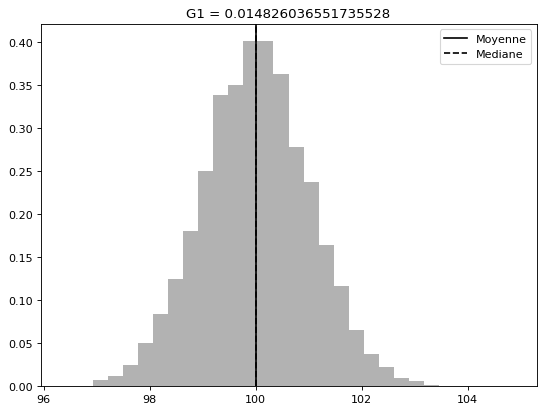

In [ ]:
numValues = 10000
maxValue = 100
skewness = 0
random = skewnorm.rvs(a = skewness,loc=maxValue, size=numValues)
df=pnd.DataFrame(random,columns=["X"])
g1 = skew(random,bias=False)
figure(figsize=(8, 6), dpi=80)
plt.hist(random,30,density=True, color = 'gray', alpha=0.6)
plt.title("G1 = "+str(g1))
plt.axvline(np.mean(random),color="black",label="Moyenne")
plt.axvline(np.median(random),linestyle="--",color="black",label="Mediane")
plt.legend()
plt.show()



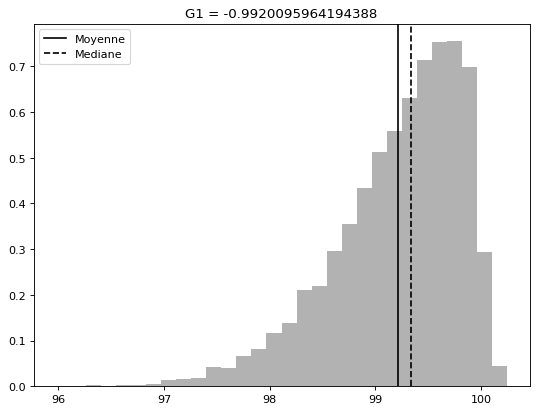

In [ ]:
numValues = 10000
maxValue = 100
skewness = -10
random = skewnorm.rvs(a = skewness,loc=maxValue, size=numValues)
df=pnd.DataFrame(random,columns=["X"])
g1 = skew(random,bias=False)
figure(figsize=(8, 6), dpi=80)
plt.hist(random,30,density=True, color = 'gray', alpha=0.6)
plt.axvline(np.mean(random),color="black",label="Moyenne")
plt.axvline(np.median(random),linestyle="--",color="black",label="Mediane")
plt.legend()
plt.title("G1 = "+str(g1))
plt.show()


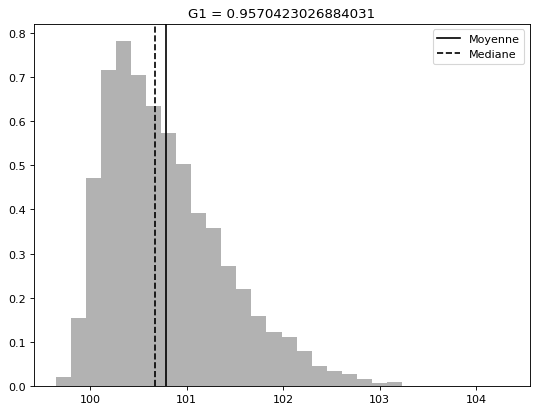

In [ ]:
numValues = 10000
maxValue = 100
skewness = 8
random = skewnorm.rvs(a = skewness,loc=maxValue, size=numValues)
df=pnd.DataFrame(random,columns=["X"])
g1 = skew(random,bias=False)
figure(figsize=(8, 6), dpi=80)
plt.hist(random,30,density=True, color = 'gray', alpha=0.6)
plt.title("G1 = "+str(g1))
plt.axvline(np.mean(random),color="black",label="Moyenne")
plt.axvline(np.median(random),linestyle="--",color="black",label="Mediane")
plt.legend()
plt.show()


### Coefficient d'aplatissement de Fisher (Kurtosis)

In [ ]:
def moment(X,ordre):
  N=len(X)
  Moy = np.mean(X)
  somme = 0
  for j in range(0,N):
    somme += (X[j] - Moy)**ordre
  return somme/N

In [ ]:
#Avec biais
m4 = moment(datas,4)
m2 = moment(datas,2)
v = np.var(datas)
g2= (m4 / m2**2)-3.0
print(g2)

0.6798454221165278


In [ ]:
#Sans biais
N=16
a = (N*(N+1)) / ((N-1) * (N-2) * (N-3))
c = 3*(N-1)**2 / ((N-2)*(N-3))
x_bar = np.mean(datas)
ecart_type = np.std(datas,ddof=1)
b = 0
for i in range (0,len(datas)):
  xi = datas[i]
  b += ((xi - x_bar) / ecart_type)**4

g2 = (a*b)-c
print("Kurtosis corrigé: ",g2)


51.74782624851366
Kurtosis corrigé:  1.4470361683500794


In [ ]:
#Scipy avec biais
print(kurtosis(datas))

#Scipy sans biais
print(kurtosis(datas,bias=False))

0.6798454221165278
1.4470361683500803


In [ ]:
#Pandas
df["X"].kurtosis()

1.4470361683500803

#### Simulations

In [ ]:
#Différentes loi de distributions
laplace = getattr(stats, 'laplace')
cosinus = getattr(stats, 'cosine')
normale = getattr(stats, 'norm')

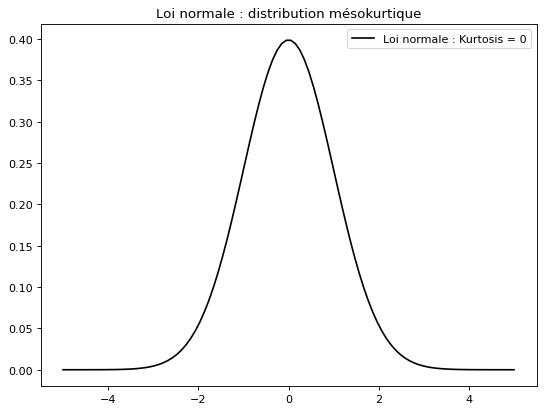

In [ ]:
x = np.linspace(-5, 5, 100)
datasNormale = normale.rvs(size=1000)
yNormale = normale.pdf(x)

figure(figsize=(8, 6), dpi=80)
plt.plot(x,yNormale,color="black",label=("Loi normale : Kurtosis = "+str(round(kurtosis(datasNormale,bias=False)))))
plt.title("Loi normale : distribution mésokurtique")
plt.legend()
plt.show()

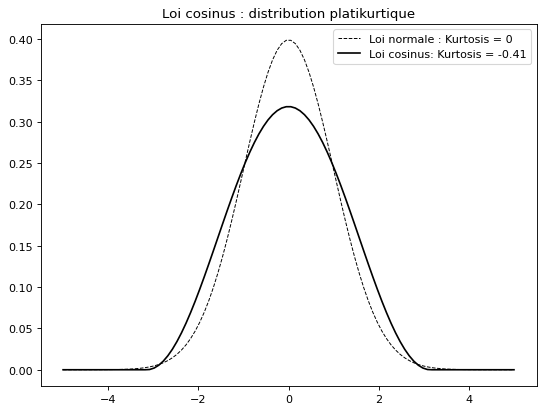

In [ ]:
#Loi Normale / Loi Cosinus
x = np.linspace(-5, 5, 100)
datasNormale = normale.rvs(size=1000)
yNormale = normale.pdf(x)

datasCosinus = cosinus.rvs(size=1000)
yCosinus = cosinus.pdf(x)

figure(figsize=(8, 6), dpi=80)
plt.plot(x,yNormale,color="black",linestyle="--",linewidth=0.87,label=("Loi normale : Kurtosis = "+str(round(kurtosis(datasNormale,bias=False)))))
plt.plot(x,yCosinus,color="black",label=("Loi cosinus: Kurtosis = "+str(round(kurtosis(datasCosinus,bias=False),2))))
plt.title("Loi cosinus : distribution platikurtique")
plt.legend()
plt.show()

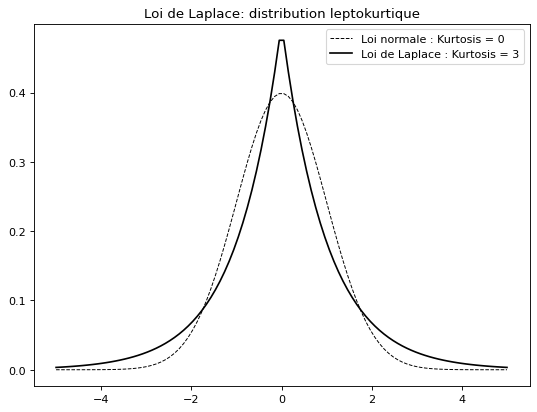

In [ ]:
#Loi Normale / Loi de Laplace
x = np.linspace(-5, 5, 100)
datasNormale = normale.rvs(size=1000)
yNormale = normale.pdf(x)

datasLaplace = laplace.rvs(size=1000)
yLaplace = laplace.pdf(x)

figure(figsize=(8, 6), dpi=80)
plt.plot(x,yNormale,color="black",linestyle="--",linewidth=0.87,label=("Loi normale : Kurtosis = "+str(round(kurtosis(datasNormale,bias=False)))))
plt.plot(x,yLaplace,color="black",label=("Loi de Laplace : Kurtosis = "+str(round(kurtosis(datasLaplace,bias=False)))))
plt.title("Loi de Laplace: distribution leptokurtique")
plt.legend()
plt.show()